In [21]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

In [22]:
df = pd.read_csv('heart_attack_predictions.csv')

df.head(10)

,Country,Age,Gender,Cholesterol_Level,Blood_Pressure,Smoking_History,Alcohol_Consumption,Physical_Activity,Obesity,Diabetes,...,LDL_Cholesterol,Triglycerides,Heart_Disease_Risk,Medication_Adherence,Urbanization_Level,Air_Pollution_Exposure,Access_To_Healthcare,Education_Level,Income_Level,Heart_Attack_Outcome
0,Germany,39,Male,210.091036,173.301650,Never,0.531933,Active,No,No,...,68.333573,165.060897,Medium,No,Urban,51.988416,Good,Tertiary,Low,Died
1,Egypt,88,Male,163.998730,137.381678,Former,5.626668,Sedentary,Yes,Yes,...,98.194015,452.124651,Medium,No,Suburban,97.739896,Good,NaN,Low,Died
2,Spain,60,Female,263.502590,139.737677,Former,0.928015,Active,No,Yes,...,118.767677,171.432620,Low,No,Urban,60.352793,Poor,Tertiary,Low,Survived
3,Canada,25,Female,292.003927,85.992807,Former,7.374519,Active,No,Yes,...,190.190597,329.553258,Medium,No,Urban,14.397347,Good,Secondary,High,Survived
4,France,54,Female,267.736563,119.882856,Former,4.317845,Sedentary,Yes,No,...,188.209372,449.953074,High,Yes,Rural,69.448684,Good,NaN,Low,Died
5,Pakistan,89,Male,192.824536,84.614988,Current,4.275495,Active,Yes,Yes,...,91.718371,476.605123,High,Yes,Suburban,23.806738,Good,Primary,Medium,Died
6,Germany,37,Female,248.192810,119.187008,Current,9.786531,Moderate,No,No,...,111.451727,471.972380,High,No,Urban,81.992726,Poor,Secondary,Medium,Died
7,Nigeria,67,Female,190.648952,88.151404,Current,0.282693,Active,Yes,Yes,...,134.535071,438.827926,Low,No,Urban,57.804529,Good,Primary,Medium,Died
8,Vietnam,36,Female,167.748324,174.399328,Never,3.382476,Active,Yes,No,...,136.219095,126.158745,Low,Yes,Suburban,20.029875,Poor,Secondary,Medium,Died
9,Canada,67,Female,170.507186,164.832277,Former,6.146588,Moderate,No,Yes,...,129.812473,376.639056,Low,Yes,Urban,95.596014,Poor,Tertiary,High,Survived


In [23]:
print("Amount of columns: ", df.shape[0])
print(df.isnull().sum())


Amount of columns:  623027
Country                         0
Age                             0
Gender                          0
Cholesterol_Level               0
Blood_Pressure                  0
Smoking_History                 0
Alcohol_Consumption             0
Physical_Activity               0
Obesity                         0
Diabetes                        0
Family_History                  0
Stress_Levels                   0
Dietary_Habits                  0
Heart_Attack_History            0
Chest_Pain                      0
Exercise_Induced_Angina         0
Resting_ECG                     0
Max_Heart_Rate_Achieved         0
Thalassemia                     0
HDL_Cholesterol                 0
LDL_Cholesterol                 0
Triglycerides                   0
Heart_Disease_Risk              0
Medication_Adherence            0
Urbanization_Level              0
Air_Pollution_Exposure          0
Access_To_Healthcare            0
Education_Level            155697
Income_Level         

In [24]:
df = df[['Age', 'Gender', 'Cholesterol_Level', 'Blood_Pressure', 'Smoking_History', 'Obesity', 'Diabetes', 'Family_History', 'Max_Heart_Rate_Achieved', 'Thalassemia', 'Heart_Attack_History', 'Heart_Attack_Outcome']]

df.head(10)

,Age,Gender,Cholesterol_Level,Blood_Pressure,Smoking_History,Obesity,Diabetes,Family_History,Max_Heart_Rate_Achieved,Thalassemia,Heart_Attack_History,Heart_Attack_Outcome
0,39,Male,210.091036,173.301650,Never,No,No,Yes,170,Reversible Defect,Yes,Died
1,88,Male,163.998730,137.381678,Former,Yes,Yes,No,155,Reversible Defect,Yes,Died
2,60,Female,263.502590,139.737677,Former,No,Yes,No,114,Normal,Yes,Survived
3,25,Female,292.003927,85.992807,Former,No,Yes,Yes,123,Normal,Yes,Survived
4,54,Female,267.736563,119.882856,Former,Yes,No,No,195,Reversible Defect,No,Died
5,89,Male,192.824536,84.614988,Current,Yes,Yes,Yes,114,Reversible Defect,No,Died
6,37,Female,248.192810,119.187008,Current,No,No,No,142,Normal,Yes,Died
7,67,Female,190.648952,88.151404,Current,Yes,Yes,No,152,Normal,Yes,Died
8,36,Female,167.748324,174.399328,Never,Yes,No,No,95,Fixed Defect,No,Died
9,67,Female,170.507186,164.832277,Former,No,Yes,No,109,Reversible Defect,No,Survived


In [25]:
# Encode categorical columns
categorical_cols = ['Gender',
                    'Smoking_History', 'Obesity', 'Diabetes', 'Family_History', 'Thalassemia', 'Heart_Attack_History','Heart_Attack_Outcome']

for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])
    
df.head(10)


,Age,Gender,Cholesterol_Level,Blood_Pressure,Smoking_History,Obesity,Diabetes,Family_History,Max_Heart_Rate_Achieved,Thalassemia,Heart_Attack_History,Heart_Attack_Outcome
0,39,1,210.091036,173.301650,2,0,0,1,170,2,1,0
1,88,1,163.998730,137.381678,1,1,1,0,155,2,1,0
2,60,0,263.502590,139.737677,1,0,1,0,114,1,1,1
3,25,0,292.003927,85.992807,1,0,1,1,123,1,1,1
4,54,0,267.736563,119.882856,1,1,0,0,195,2,0,0
5,89,1,192.824536,84.614988,0,1,1,1,114,2,0,0
6,37,0,248.192810,119.187008,0,0,0,0,142,1,1,0
7,67,0,190.648952,88.151404,0,1,1,0,152,1,1,0
8,36,0,167.748324,174.399328,2,1,0,0,95,0,0,0
9,67,0,170.507186,164.832277,1,0,1,0,109,2,0,1


In [26]:
# Define target variable
X = df.drop(columns=['Heart_Attack_Outcome'])
y = df['Heart_Attack_Outcome']

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [27]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [31]:

# Train k-NN model
knn = KNeighborsClassifier(n_neighbors=20, metric='manhattan')
knn.fit(X_train, y_train)


KNeighborsClassifier(metric='manhattan', n_neighbors=20)

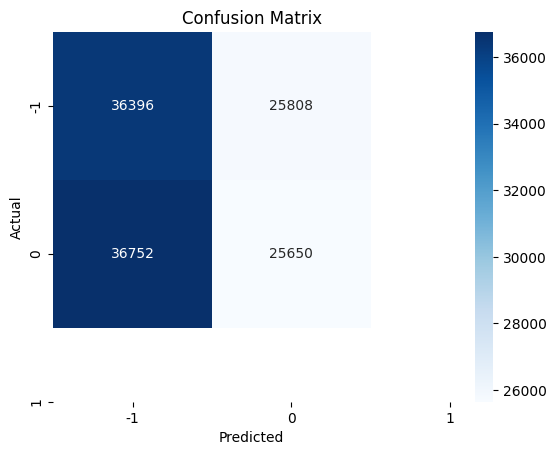

In [ ]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)


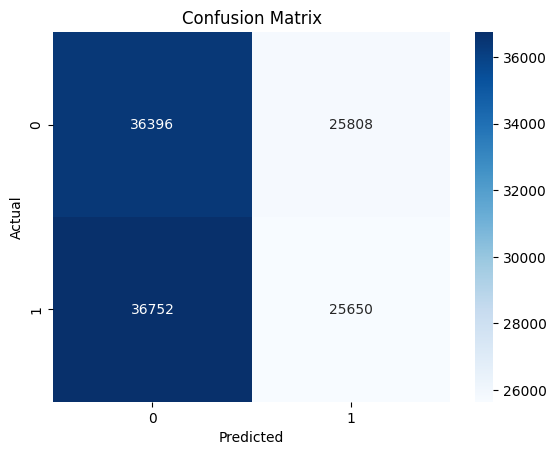

In [35]:

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [33]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.49793749899683803
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.59      0.54     62204
           1       0.50      0.41      0.45     62402

    accuracy                           0.50    124606
   macro avg       0.50      0.50      0.49    124606
weighted avg       0.50      0.50      0.49    124606

